# Brooks Tawil
# ECE: 445 Machine Learning for Engineers
## Mini Jupyter Exercise 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Synthetic Data
Create a matrix A ∈ R
3×2 whose individual entries are drawn from a Gaussian distribution with mean
0 and variance 1 in an independent and identically distributed (iid) fashion. Once generated, this
matrix should not be changed for the rest of this exercise

In [2]:
mean = 0
variance = 1
aDimensions = (3, 2)
A = np.random.normal(mean, variance, aDimensions)
print (A)
print ("A has rank: " + str(np.linalg.matrix_rank(A)))

[[ 1.06903507  0.57229272]
 [ 1.53008086 -1.58846275]
 [-0.81004398 -0.01464128]]
A has rank: 2


### Generation of Dataset #1
Each of our data sample $x ∈ R^3$
is going to be generated in the following fashion: $x = Av$, where
$v ∈ R^2$ is a random vector whose entries are iid Gaussian with mean 0 and variance 1. Note that we will have a different $v$ for each new data sample (i.e., unlike A, it is not fixed for each data sample).

In [3]:
# V is a 2x1 vector, while A is a 3x2 matrix
# We need a 3x500 empty matrix to store all of these 500 data samples
vDimensions = (2, 1)
X = np.array(np.zeros((3,500)))

# Multiply A and v_i, store result in the large data matrix X
for i in range(500):
    v_i = np.random.normal(mean, variance, vDimensions)
    x = np.matmul(A, v_i)
    for j in range(3):
        X[j,i] = x[j]

print ("X is of dimensions: " + str(X.shape))
print (X)

X is of dimensions: (3, 500)
[[ 0.95153736  0.98304137 -0.54839689 ...  1.35950286 -1.7446437
   2.0200071 ]
 [ 1.4781823  -1.60209708  1.13054688 ... -0.37997166  2.80263011
   0.28381986]
 [-0.74124765 -0.22119182  0.08218082 ... -0.62536942  0.39963744
  -1.07685238]]


The rank of the matrix resulting from multiplying A and V is equal to 2. The rank of the resulting matrix is bounded by the minimum of the ranks of the matrices A and V. This is becuase the linear transformation of these matrices cannot increase the dimensions of result.

In [4]:
print ("X has rank: " + str(np.linalg.matrix_rank(X)))

X has rank: 2


### Singular Value and Eigenvalue Decomposition of Dataset #1
1. Compute the singular value decomposition of X and the eigenvalue decomposition of $XX^T$

In [5]:
u, s, v = np.linalg.svd(X)
w, v = np.linalg.eig(np.matmul(X, np.matrix.transpose(X)))

The columns of $U$ form the left singular values of X. We can correspond these to the eignevectors of $XX^T$. The singular values of $X$ are the square roots of the eigenvalues of $XX^T$ as shown below:

In [6]:
print ("S:\t " + str(s))
print ("W:\t " + str(w))
print ("SQRT(W): " + str(np.sqrt(w)))

S:	 [5.34090225e+01 2.83151645e+01 1.32312906e-14]
W:	 [2.85252369e+03 8.01748541e+02 2.17607138e-13]
SQRT(W): [5.34090225e+01 2.83151645e+01 4.66483802e-07]


When comparing the, already sorted, singular value matrix S and the, unsorted, square root of the eignevalue matrix W, the same principal components appear. (Due to floating point/rounding error the S matrix has an extremely small value instead of the expected 0.)

Additionally, the energy in $X$, defined by $||X||^2_F$, is equal to the sum of the squares of the singular values of X, as shown below:

In [7]:
print ("Sum of squares of S: " + str(np.sum(np.square(s))))
print ("Energy of X:  \t     " + str(np.square(np.linalg.norm(X))))

Sum of squares of S: 3654.2722261858817
Energy of X:  	     3654.272226185883


2. Since the rank of X is 2, it means that the entire dataset spans only a two-dimensional space in $R^3$

In [8]:
print ("S: " + str(s))

S: [5.34090225e+01 2.83151645e+01 1.32312906e-14]


We can see that, eventhough we expect to have 2 non-zero values in S with the third value being zero. Yet our third value, while extremely small, is not exactly equal to zero. That may be happening due to the underlying nature of floating point operations. A representation of a floating point number may lead to small errors that result from computations.

There is a relationship between the two largest singular values of X and the columns of A, and that is the fact that the sequence of singular values is unique. If the singular values are all distinct, then the sequence of singular vectors is unique also. However, when some set of singular values are equal, the corresponding singular vectors span some subspace.

### PCA of Dataset #1 
1. Since each data sample $x_i$ lies in a three-dimensional space, we can have up to three principal components of this data. However, based on your knowledge of how the data was created (and subsequent discussion above), how many principal components should be enough to capture all variation in the data? Justify your answer as much as you can.

The  data was created to be a 2-dimensional span in $R^3$. This means our data can be scaled down to one less dimension without significant loss. Based off of the previous work and the generation of the data, we should only need 2 principal components in order to capture the variation in the data. 

2. While mean centering is an important preprocessing step for PCA, we do not necessarily need to carry
out mean centering in this problem since the mean vector will have small entries. Indeed, if we let $x_1$,
$x_2$, and $x_3$ denote the first, second, and third component of the random vector x then it follows that
$E[x_k] = 0$, $k = 1, 2, 3$.

In [9]:
print (X[:,0])

[ 0.95153736  1.4781823  -0.74124765]


In [10]:
m = np.array(np.zeros((1,500)))

# Take the mean of the columns of X
print (X.shape)
print (np.mean(X, 1))

(3, 500)
[-0.01727269 -0.08582702  0.0237226 ]


The entries in the above computation are indeed small and mean centering is not necessarily needed in this case.

3. Compute the top two principal components $U = [ u_1, u_2 ]$ of this dataset and print them.

In [11]:
# To calculate PCA we need the SVD of the original data matrix X
x_U, x_S, x_V = np.linalg.svd(X)

print ("The matrix of eigenvectors (U_m): \n" + str(x_U))

# From here we must select a certain amopunt of principal components with which to do the transformation.
# The problem specifies to select the largest 2 thus we will take the 2 largest columns from the eigenvector matrix

x_U_reduced = np.array([x_U[:,0],x_U[:,1]]).transpose()

print ("The top 2 principal components (U(k=2)): \n" + str(x_U_reduced))

The matrix of eigenvectors (U_m): 
[[-0.25506419  0.85687389  0.44800603]
 [-0.92233093 -0.35469422  0.15328951]
 [ 0.29025493 -0.37411115  0.88079108]]
The top 2 principal components (U(k=2)): 
[[-0.25506419  0.85687389]
 [-0.92233093 -0.35469422]
 [ 0.29025493 -0.37411115]]


In [12]:
# With the reduced U matrix we can project our original data, X, onto a
feature_matrix = np.matmul(x_U_reduced.transpose(), X)

# By multiplying the top 2 principal components we have successfully projected the data.
# The dimensions of the feature matrix are expected to be 2x500
print (feature_matrix.shape)

(2, 500)


Reconstruct (approximate) the original data samples $x_i$ from the PCA feature vectors.

We simply take our feature matrix, and multiply by the original principal components.

In [13]:
X_carrot = np.matmul(x_U_reduced, feature_matrix)
print (X_carrot.shape)

(3, 500)


The representation error between the actual data and the reformed data can be calculated by subtracing the two matrices and squaring the result:

In [14]:
print ("Representation error: " + str(np.square(np.linalg.norm(abs(np.subtract(X_carrot, X))))))

Representation error: 1.0566167809087142e-27


Eventhough this value is not zero, thery are on the order of at least $10^{-10}$ and can be treated as zero for all practical purposes.

5. Now compute feature vectors $X'_i$ from data samples $X_i$ by projecting data onto the top principal
component of $X$

In [15]:
# We can get the top principal component just as before
x_U_reduced = np.array([x_U[:,0]]).transpose()
print ("The top principal component1 (U_(k=1): \n" + str(x_U_reduced))

The top principal component1 (U_(k=1): 
[[-0.25506419]
 [-0.92233093]
 [ 0.29025493]]


We can do the same operations as before but using only the top principal component.

In [16]:
feature_matrix = np.matmul(x_U_reduced.transpose(), X)
# By multiplying the top principal component we have successfully projected the data.
# The dimensions of the feature matrix are expected to be 1x500
print (feature_matrix.shape)

(1, 500)


We can again reconstruct (approximate) the original data samples $x_i$ from the PCA feature vectors.

We simply take our feature matrix, and multiply by the principal component we selected before.

In [17]:
X_carrot = np.matmul(x_U_reduced, feature_matrix)
print (X_carrot.shape)

(3, 500)


Compute the representation error $||X'-X||^2_F$ and show that this error is equal to the square of the second-largest singular value of X

In [18]:
print ("Representation error: " + str(np.square(np.linalg.norm(abs(np.subtract(X_carrot, X))))))

Representation error: 801.7485410121249


If we look at this represntation error and the second largest singular value of X, calculated early in the exercise, we can see that they are equal below (within floating point error).

In [19]:
print ("Second largest singular value: " + str(np.square(s[1])))

Second largest singular value: 801.7485410121249


We can make a 3D scatter plot of the original data and the reconstructed data. 

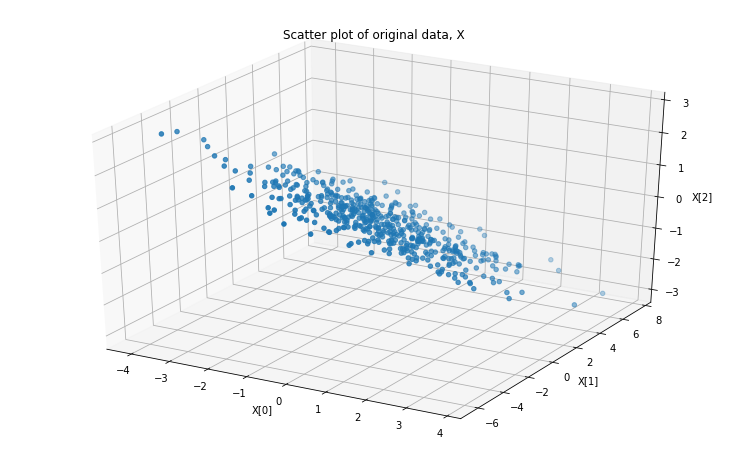

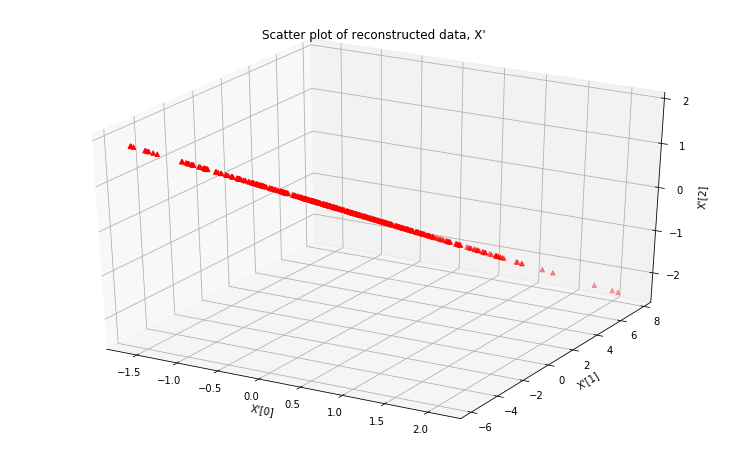

In [20]:
# First, the scatter of the original data, X is shown
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X[0]')
ax.set_ylabel('X[1]')
ax.set_zlabel('X[2]')
ax.set_title('Scatter plot of original data, X')
ax.scatter(X[0,:], X[1,:], X[2,:], marker='o')
plt.show()

# Then, the scatter of the reconstructed data is shown
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X'[0]")
ax.set_ylabel("X'[1]")
ax.set_zlabel("X'[2]")
ax.set_title("Scatter plot of reconstructed data, X'")
ax.scatter(X_carrot[0,:], X_carrot[1,:], X_carrot[2,:], c='r', marker='^')
plt.show()

### Generation of Dataset #2
1. Create a vector $c ∈ R_3$ whose individual entries are drawn from a Gaussian distribution with mean 0 and variance 3 in an independent and identically distributed (iid) fashion. Once generated, this vector should not be changed for the rest of this exercise.

In [21]:
mean = 0
variance = 3

cDimensions = (3, 1)
c = np.random.normal(mean, variance, cDimensions)

print (c)

[[-0.33104661]
 [-3.02788438]
 [-2.15431018]]


In [22]:
# We generate a new v_i for each entry in X
vDimensions = (2, 1)
X = np.array(np.zeros((3,500)))

# Multiply A and v_i, then add c, then store result in the large data matrix X
for i in range(500):
    v_i = np.random.normal(mean, variance, vDimensions)
    x = np.add(np.matmul(A, v_i), c)
    for j in range(3):
        X[j,i] = x[j]

print ("X is of dimensions: " + str(X.shape))
print (X)

X is of dimensions: (3, 500)
[[ -0.32247183  -3.64227545   0.69618115 ...  -0.0801865   -5.43561026
   -2.35518872]
 [  2.31968307 -13.4782122   -3.62055289 ...  -1.96669508 -12.4864092
   -1.20652489]
 [ -3.08934187   1.34865008  -2.57365408 ...  -2.46659313   2.08820322
   -1.44173194]]


Except for the addition of c to each data sample, dataset #2 is identical to dataset #1 in terms of
the generation mechanism. Addition of c, however, shifts our data from the origin, which increases
its rank. Verify this by printing the rank of X.

In [23]:
print ("Rank of X: " + str(np.linalg.matrix_rank(X)))

Rank of X: 3


The rank of X was previously equal to 2, where now it has increased to 3.



### PCA, Centering, and Dataset #2
This exercise will demonstrate the importance of centering data, before computing principal components
• Compute the top two principal components $U = [u_1, u_2]$ of dataset #2 without centering the data.

In [24]:
# To calculate PCA we need the SVD of the data matrix
x_U, x_S, x_V = np.linalg.svd(X)

print ("The matrix of eigenvectors (U_m): \n" + str(x_U))

# From here we must select a certain amopunt of principal components with which to do the transformation.
# The problem specifies to select the largest 2 thus we will take the 2 largest columns from the eigenvector matrix

x_U_reduced = np.array([x_U[:,0],x_U[:,1]]).transpose()

print ("The top 2 principal components (U_(k=2)): \n" + str(x_U_reduced))

The matrix of eigenvectors (U_m): 
[[-0.1456459   0.75956152  0.63391921]
 [-0.9865506  -0.15955867 -0.03548153]
 [ 0.0741969  -0.63056112  0.77258494]]
The top 2 principal components (U_(k=2)): 
[[-0.1456459   0.75956152]
 [-0.9865506  -0.15955867]
 [ 0.0741969  -0.63056112]]


Reconstruct (approximate) the original data samples $x_i$ from the PCA vectors by computing $x'_i = UU^Tx_i$

In [25]:
# With the reduced U matrix we can project our original data, X, onto a
feature_matrix = np.matmul(x_U_reduced.transpose(), X)

X_carrot = np.matmul(x_U_reduced, feature_matrix)
print (X_carrot.shape)

(3, 500)


Compute the representation error $||X'-X||^2_F$ and show that this error is nowhere close to being zero, despite the fact that $X$ has only two major directions of variation.

In [26]:
print ("Representation error: " + str(np.square(np.linalg.norm(abs(np.subtract(X_carrot, X))))))

Representation error: 2247.958898275976


The calculated representation error is no where close to being 0.

Repeat the previous steps by first centering the data matrix $X$ using the mean vector $m$ and then showing that the approximated data samples $x' = UU^T(x_i − m) + m$ once again lead to (almost) zero representation error

In [27]:
# First find the mean vector
m = np.mean(np.transpose(X), 1)

# With this mean vector, we can then calulate x' using the U matrix and the mean
X_carrot = np.add(np.matmul(np.matmul(x_U, np.transpose(x_U)), np.subtract(X, m)), m)

# Find the representation error of this projection after centering
print ("Representation error: " + str(np.square(np.linalg.norm(abs(np.subtract(X_carrot, X))))))

Representation error: 1.2601462855970702e-26


With the data properly centered, the representation is practically 0.

### Generation of Dataset #3
Each of our data sample $x ∈ R^3$ is initially going to be generated in the following fashion: $x = Av + n$,
where $v ∈ R^2$ is a random vector whose entries are iid Gaussian with mean 0 and variance 1 and
$n ∈ mathbbR^3$ is random noise whose entries are iid Gaussian with mean 0 and variance 0.01.

Generate 500 data samples using the aforementioned mathematical model

In [28]:
# Mean for the v and n vectors are different
meanV = 0
varianceV = 1
meanN = 0
varianceN = 0.01

# V is a 2x1 vector, while A is a 3x2 matrix
# We need a 3x500 empty matrix to store all of these 500 data samples
vDimensions = (2, 1)
nDimensions = (3, 1)
X = np.array(np.zeros((3,500)))

# Multiply A and v_i, store result in the large data matrix X
for i in range(500):
    v_i = np.random.normal(meanV, varianceV, vDimensions)
    n_i = np.random.normal(meanN, varianceN, nDimensions)
    x = np.add(np.matmul(A, v_i), n_i)
    for j in range(3):
        X[j,i] = x[j]

print ("X is of dimensions: " + str(X.shape))
print ("X: " + str(X))

X is of dimensions: (3, 500)
X: [[ 1.97656525  1.80736739  0.36596015 ... -1.31068203  0.95016949
   1.28646241]
 [ 5.52500686 -0.92972871  0.21654174 ...  0.27264654  1.92383304
   1.71806902]
 [-1.95674156 -0.73925991 -0.2388183  ...  0.63235683 -0.80166522
  -0.94760295]]


Transform these data samples into their normalized variants for better visualization purposes as follows: $x'_i = x_i/||x_i||_2$; this effectively confines our data to a unit sphere in $R^3$

In [29]:
X_norm = np.divide(X, np.linalg.norm(X))
print ('Normalized X: \n' + str(X_norm))

Normalized X: 
[[ 0.03410741  0.03118775  0.00631497 ... -0.022617    0.01639603
   0.02219907]
 [ 0.09533897 -0.01604331  0.00373662 ...  0.00470476  0.03319747
   0.02964683]
 [-0.03376534 -0.0127566  -0.00412102 ...  0.01091189 -0.01383346
  -0.01635174]]


We have added noise to our original centered data. Just because the data is centered, the noise has been added and may skew the expected value away from the initial mean. If we were to look at a gaussian distribution with noise added, there will be some manipulation of the overall shape that would change the original epected value. We can verify this by printing the ranks of the normalized data and the singular values

In [30]:
x_norm_U, x_norm_S, x_norm_V = np.linalg.svd(X_norm)

print ('Rank of X_norm: ' + str(np.linalg.matrix_rank(X_norm)))
print ('Rank of X_norm singular values: ' + str(np.linalg.matrix_rank(x_norm_U)))

Rank of X_norm: 3
Rank of X_norm singular values: 3


### PCA Denoising of Dataset #3

1. Using mpl_toolkits.mplot3d, display a 3D scatterplot corresponding to the normalized data samples x'_i

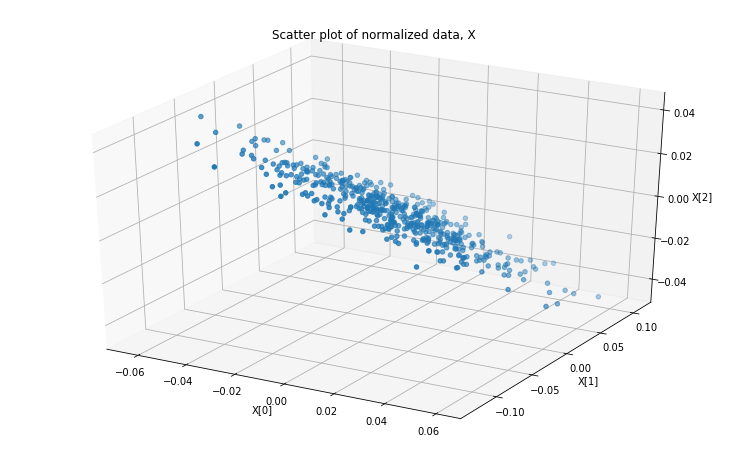

In [31]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X[0]')
ax.set_ylabel('X[1]')
ax.set_zlabel('X[2]')
ax.set_title('Scatter plot of normalized data, X')
ax.scatter(X_norm[0,:], X_norm[1,:], X_norm[2,:], marker='o')
plt.show()

2. Denoise the normalized data samples $x'_i$ by projecting and reconstructing them using the top two principal components associated with the normalized data matrix $X'$.

In [32]:
x_norm_U_reduced = np.array([x_norm_U[:,0],x_norm_U[:,1]]).transpose()

print ("The top 2 principal components (U(k=2)): \n" + str(x_norm_U_reduced))

The top 2 principal components (U(k=2)): 
[[-0.27602694  0.85024591]
 [-0.91334386 -0.37727048]
 [ 0.29935282 -0.36708157]]


In [33]:
# With the reduced U matrix we can create a feature matrix
feature_matrix = np.matmul(x_norm_U_reduced.transpose(), X_norm)
# With the feature matrix we can reconstruct our original normalized data, which is now denoised
X_carrot = np.matmul(x_norm_U_reduced, feature_matrix)

3. Using mpl_toolkits.mplot3d, display a 3D scatterplot corresponding to the denoised data samples $x'_i$.

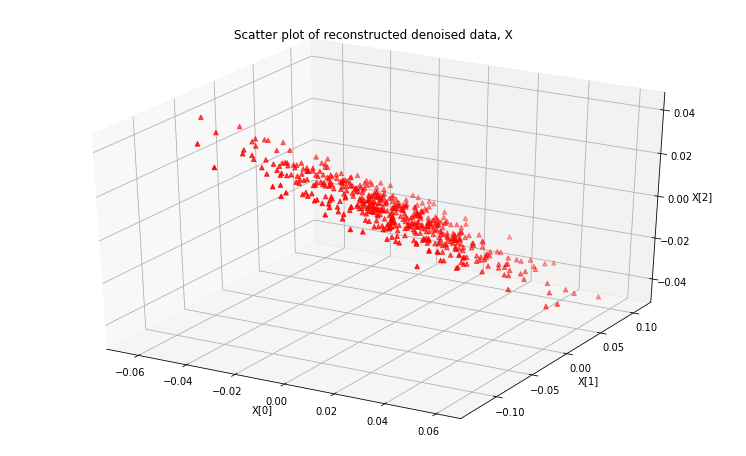

In [34]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X[0]')
ax.set_ylabel('X[1]')
ax.set_zlabel('X[2]')
ax.set_title('Scatter plot of reconstructed denoised data, X')
ax.scatter(X_carrot[0,:], X_carrot[1,:], X_carrot[2,:], c='r', marker='^')
plt.show()

4. Verify that the representation error between the normalized data matrix and its denoised version is given by the square of the third singular value of X.

In [35]:
print ("Representation error: " + str(np.square(np.linalg.norm(abs(np.subtract(X_carrot, X_norm))))))
print ("Square of the third singular value: " + str(np.square(x_norm_S[2])))

Representation error: 1.6287165145778663e-05
Square of the third singular value: 1.6287165145778473e-05


The representation error is indeed equal to the square of the third singular value.

### Real Data
In this part of the exercise, we will work with real-world data that corresponds to images of handwritten
digit ‘0’.

In [36]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)

1. Display any one of the images in the dataset as an 8 × 8 grayscale image using matplotlib.pyplot.

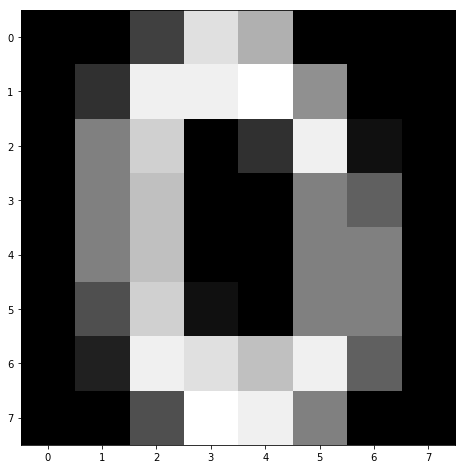

In [37]:
# We can take one of the images of a zero, reshape it, and display it
plt.figure(figsize=(13,8))
plt.imshow(np.reshape(images[10], (8,8)), cmap='gray')
plt.show()

2. Get the data ready for PCA by mean centering it; display the mean vector as an 8 × 8 grayscale image using matplotlib.pyplot

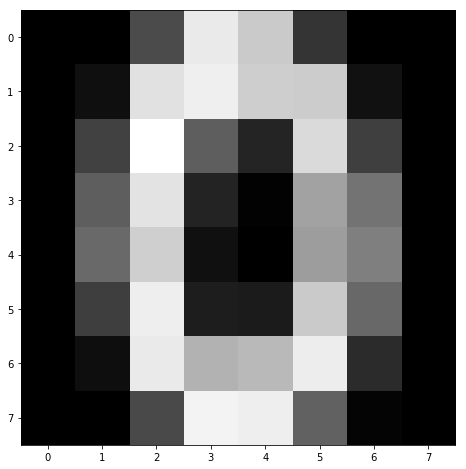

In [42]:
# The images matrix is transposed to have the columns holding the data for a given image
images_t = np.transpose(images)
images_mean = np.mean(images_t, 1)
# Resulting mean vector is 64 entries of the mean over every pixel for each image and is displayed below
# We can take one of the images of a zero, reshape it, and display it
plt.figure(figsize=(13,8))
plt.imshow(np.reshape(images_mean, (8,8)), cmap='gray')
plt.show()